In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import os
import time
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Dropout
from keras import Sequential
from sklearn.metrics import classification_report
import pickle
from sklearn.ensemble import RandomForestClassifier

In [2]:
def ajout_image_x(liste=['A', 'B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W',"X","Y"]):
    from PIL import Image
    from matplotlib.offsetbox import OffsetImage,AnnotationBbox
    place=0
    xy = [0.0, 0.0]
    for i in liste :
#         print(i)
#         print(place)
        img = Image.open(f'C:/Users/thiba/Documents/GitHub/ProjetIA/Dev_Biwi/images-ind_alphabet/{i}_{place}.png')
        img = img.resize((28,28))
        imagebox = OffsetImage(img, zoom=0.8)
        ab = AnnotationBbox(imagebox, xy,
                    xybox=(place, 24.),
                    pad=0.5,frameon=False)
        ax.add_artist(ab)  
        place=place+1
def ajout_image_y(liste=['A', 'B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W',"X","Y"]):
    from PIL import Image
    from matplotlib.offsetbox import OffsetImage,AnnotationBbox
    place=0
    xy = [0.0, 0.0]
    for i in liste :
#         print(i)
#         print(place)
        img = Image.open(f'C:/Users/thiba/Documents/GitHub/ProjetIA/Dev_Biwi/images-ind_alphabet/{i}_{place}.png')
        img = img.resize((28,28))
        imagebox = OffsetImage(img, zoom=0.8)
        ab = AnnotationBbox(imagebox, xy,
                    xybox=(-1,place),
                    pad=0.5,frameon=False)
        ax.add_artist(ab)  
        place=place+1

In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [4]:
df = pd.read_csv("landmark.csv",on_bad_lines='skip')
X = df.drop(df.columns[0], axis = 1)
y = df[df.columns[0]]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

len(y_train.unique())

#y_train=keras.utils.to_categorical(y_train,27)
#y_test=keras.utils.to_categorical(y_test)

24

In [6]:
print("X_train shape" +  str(X_train.shape))
print("y_train shape" +  str(y_train.shape))
print("X_test shape" +  str(X_test.shape))
print("y_test shape" +  str(y_test.shape))

X_train shape(43281, 63)
y_train shape(43281,)
X_test shape(14428, 63)
y_test shape(14428,)


## Random Forest

In [7]:
from sklearn.ensemble import RandomForestClassifier
start = time.time()
model = RandomForestClassifier()

reg = model.fit(X_train,y_train)
stop1 = time.time()

start2=time.time()
Y_pred = model.predict(X_test)
stop2 = time.time()

apprentissage_RFC = round(stop1-start,3)
prediction_RFC = round(stop2-start2,3)
app_prediction_RFC = round(stop2-start,3)

print(f"Temps d'apprentissage : {apprentissage_RFC} s")
print(f"Temps de prediction : {prediction_RFC} s")
print(f"Temps d'apprentissage+prediction : {app_prediction_RFC} s")

Temps d'apprentissage : 25.708 s
Temps de prediction : 0.239 s
Temps d'apprentissage+prediction : 25.947 s


In [8]:
with open('my_model.pkl', 'wb') as f:
  pickle.dump(model, f)

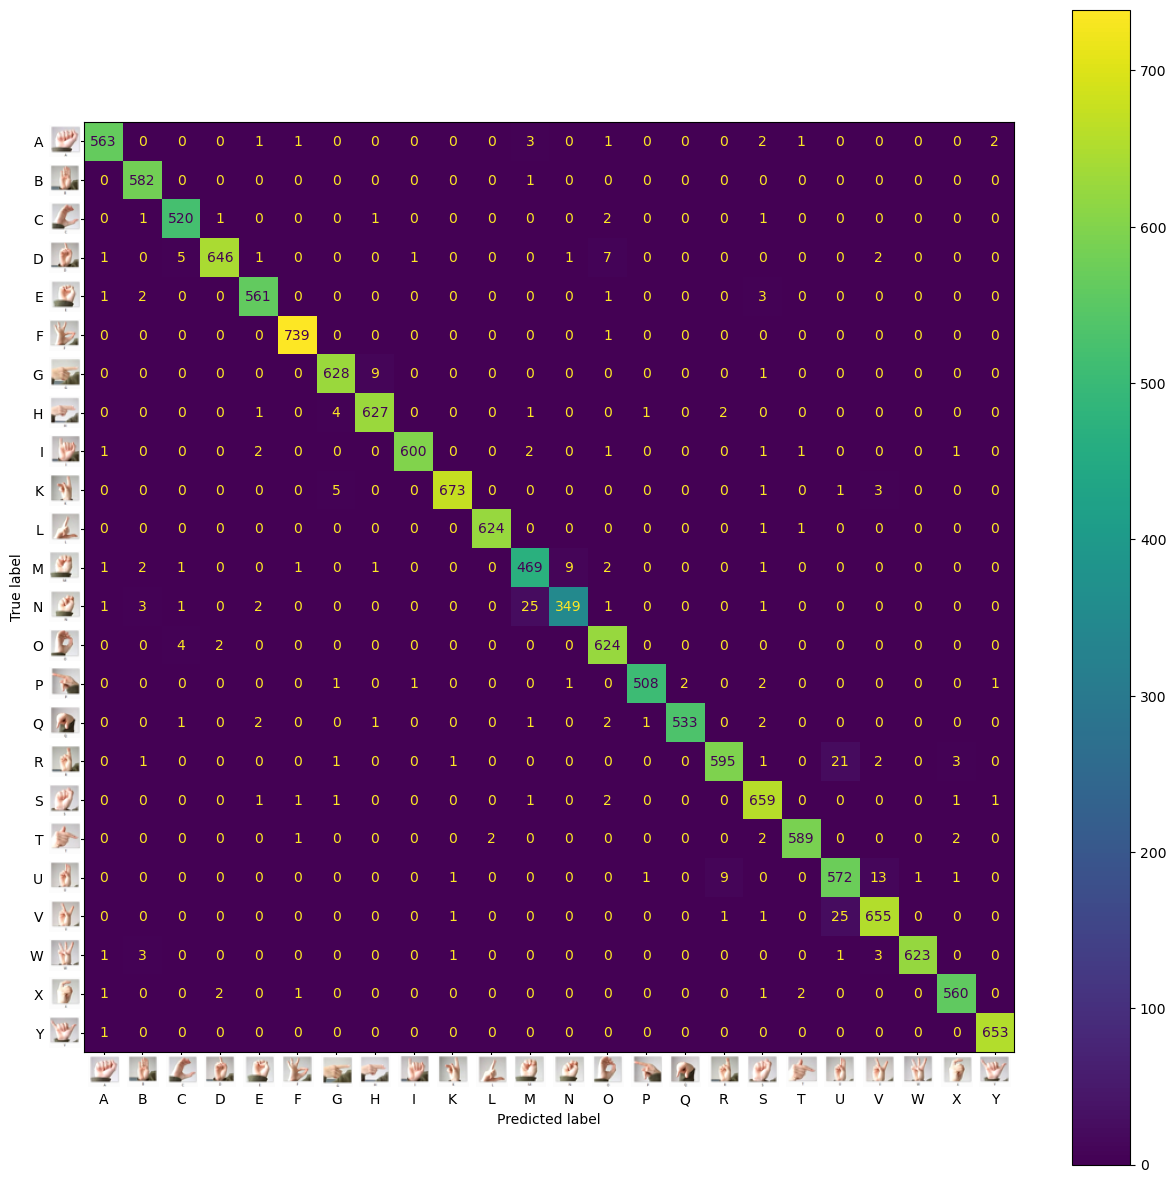

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 10))
cm = confusion_matrix(y_test,Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)

ASL_ticks=['A', 'B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W',"X","Y"]
ax.tick_params(axis='x', which='major', pad=26)
ax.tick_params(axis='y', which='major', pad=26)
# Set the x-tick labels
ax.set_xticklabels(ASL_ticks)
ax.set_yticklabels(ASL_ticks)
xtick_positions = ax.get_xticks()
ytick_positions = ax.get_yticks()

ajout_image_x()
ajout_image_y()

fig.set_size_inches(15, 15)

In [10]:
from sklearn.metrics import classification_report

print(classification_report(y_test, Y_pred))
report = classification_report(y_test, Y_pred,output_dict=True)

classification_report_RFC = pd.DataFrame.from_dict(report)
classification_report_RFC
score_classification_RFC=classification_report_RFC['macro avg']


              precision    recall  f1-score   support

           0       0.99      0.98      0.98       574
           1       0.98      1.00      0.99       583
           2       0.98      0.99      0.98       526
           3       0.99      0.97      0.98       664
           4       0.98      0.99      0.99       568
           5       0.99      1.00      1.00       740
           6       0.98      0.98      0.98       638
           7       0.98      0.99      0.98       636
           8       1.00      0.99      0.99       609
           9       0.99      0.99      0.99       683
          10       1.00      1.00      1.00       626
          11       0.93      0.96      0.95       487
          12       0.97      0.91      0.94       383
          13       0.97      0.99      0.98       630
          14       0.99      0.98      0.99       516
          15       1.00      0.98      0.99       543
          16       0.98      0.95      0.97       625
          17       0.97    

## CNN

In [11]:
from keras.layers import Conv2D,Flatten,MaxPool2D,BatchNormalization,Activation,Dropout
from keras import Sequential
from keras.preprocessing.image import ImageDataGenerator

In [12]:
print("X_train shape" +  str(X_train.shape))
print("y_train shape" +  str(y_train.shape))
print("X_test shape" +  str(X_test.shape))
print("y_test shape" +  str(y_test.shape))

X_train shape(43281, 63)
y_train shape(43281,)
X_test shape(14428, 63)
y_test shape(14428,)


In [13]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=63, input_shape=[63]),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=24, activation='softmax')
])

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 63)                4032      
                                                                 
 dropout (Dropout)           (None, 63)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8192      
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dense_3 (Dense)             (None, 512)               131584    
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0

In [14]:
model1.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [15]:
y_train_encoded = pd.get_dummies(y_train, prefix='target')
y_test_encoded = pd.get_dummies(y_test, prefix='target')
y_train_encoded.head(3)

target_0  target_1  target_2  target_3  target_4  target_5  target_6  \
52492         0         0         0         0         0         0         0   
7305          0         0         0         1         0         0         0   
29994         0         0         0         0         0         0         0   

       target_7  target_8  target_9  ...  target_14  target_15  target_16  \
52492         0         0         0  ...          0          0          0   
7305          0         0         0  ...          0          0          0   
29994         0         0         0  ...          0          0          0   

       target_17  target_18  target_19  target_20  target_21  target_22  \
52492          0          0          0          0          1          0   
7305           0          0          0          0          0          0   
29994          0          0          0          0          0          0   

       target_23  
52492          0  
7305           0  
29994          0  

[3 rows x 24 columns]

In [16]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True
)

In [17]:
start = time.time()

history = model1.fit(
    X_train,
    y_train_encoded,
    validation_split =0.2,
    epochs=25,
    callbacks=[early_stop]
)

stop1 = time.time()


start2 = time.time()
y_pred = model1.predict(X_test)
stop2 = time.time()

apprentissage_CNN = round(stop1-start,3)
prediction_CNN = round(stop2-start2,3)
app_prediction_CNN = round(stop2-start,3)

print(f"Temps d'apprentissage : {apprentissage_CNN} s")
print(f"Temps de prediction : {prediction_CNN} s")
print(f"Temps d'apprentissage+prediction : {app_prediction_CNN} s")

Epoch 1/25
1082/1082 [==============================] - 3s 2ms/step - loss: 1.0000 - accuracy: 0.6517 - val_loss: 0.2536 - val_accuracy: 0.9091
Epoch 2/25
1082/1082 [==============================] - 2s 2ms/step - loss: 0.3307 - accuracy: 0.8850 - val_loss: 0.2003 - val_accuracy: 0.9357
Epoch 3/25
1082/1082 [==============================] - 3s 2ms/step - loss: 0.2520 - accuracy: 0.9168 - val_loss: 0.2014 - val_accuracy: 0.9366
Epoch 4/25
1082/1082 [==============================] - 3s 2ms/step - loss: 0.2391 - accuracy: 0.9225 - val_loss: 0.1576 - val_accuracy: 0.9530
Epoch 5/25
1082/1082 [==============================] - 3s 2ms/step - loss: 0.2118 - accuracy: 0.9315 - val_loss: 0.1355 - val_accuracy: 0.9534
Epoch 6/25
1082/1082 [==============================] - 3s 2ms/step - loss: 0.1924 - accuracy: 0.9390 - val_loss: 0.1206 - val_accuracy: 0.9629
Epoch 7/25
1082/1082 [==============================] - 3s 2ms/step - loss: 0.1927 - accuracy: 0.9396 - val_loss: 0.2243 - val_accuracy:

In [18]:
#  tf.saved_model.save(model1, r"C:/Users/Maxime.ALTER/ProjetIA/ProjetIA/Dev_max/CNN.pb")

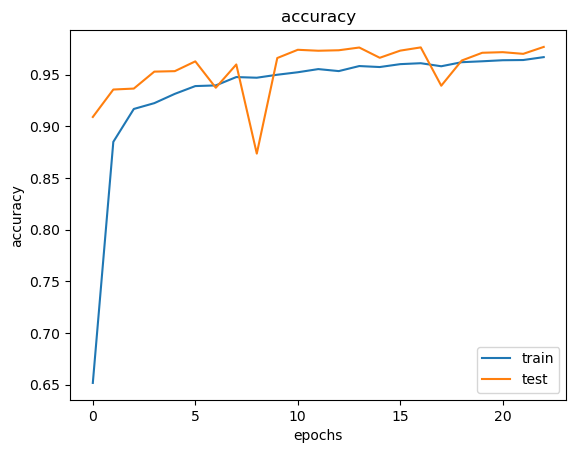

In [19]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(["train","test"])

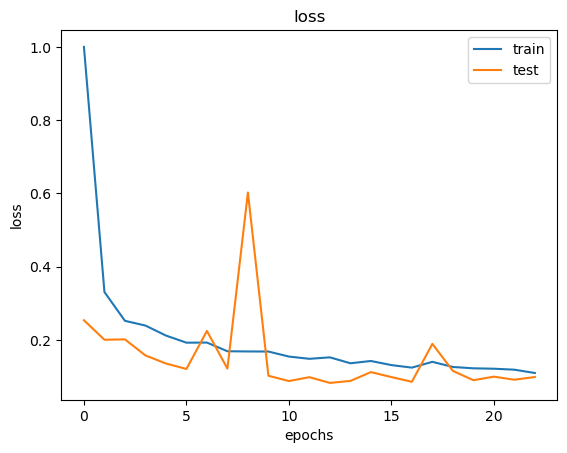

In [20]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(["train","test"])

In [21]:
liste_lettre=['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W',"X","Y"]
liste_nb = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]

y_pred_value = np.argmax(y_pred, axis=1)

print(y_pred_value)
print(y_test)
#y_test2 = []

#for value in y_test : 
#    if value in liste_lettre:
#        y_test2.append(liste_lettre.index(value))
#
#print(y_test2)

[ 7 13  6 ...  8 22  1]
18046     7
31034    13
15871     6
24589     9
43440    18
         ..
57558    23
56576    23
22071     8
53110    22
3944      1
Name: 0, Length: 14428, dtype: int64


In [22]:
print(y_test.shape, y_pred_value.shape)


(14428,) (14428,)


In [23]:
print(classification_report(y_test, y_pred_value))

report = classification_report(y_test, y_pred_value,output_dict=True)

classification_report_CNN = pd.DataFrame.from_dict(report)
classification_report_CNN
score_classification_CNN=classification_report_CNN['macro avg']


              precision    recall  f1-score   support

           0       0.99      0.97      0.98       574
           1       0.99      1.00      0.99       583
           2       1.00      1.00      1.00       526
           3       1.00      0.96      0.98       664
           4       0.99      0.98      0.99       568
           5       1.00      1.00      1.00       740
           6       0.97      0.99      0.98       638
           7       0.98      0.98      0.98       636
           8       0.98      0.98      0.98       609
           9       1.00      0.97      0.99       683
          10       1.00      0.99      0.99       626
          11       0.71      0.99      0.82       487
          12       0.99      0.50      0.66       383
          13       0.96      1.00      0.98       630
          14       0.99      0.98      0.99       516
          15       0.99      0.99      0.99       543
          16       0.99      0.97      0.98       625
          17       0.97    

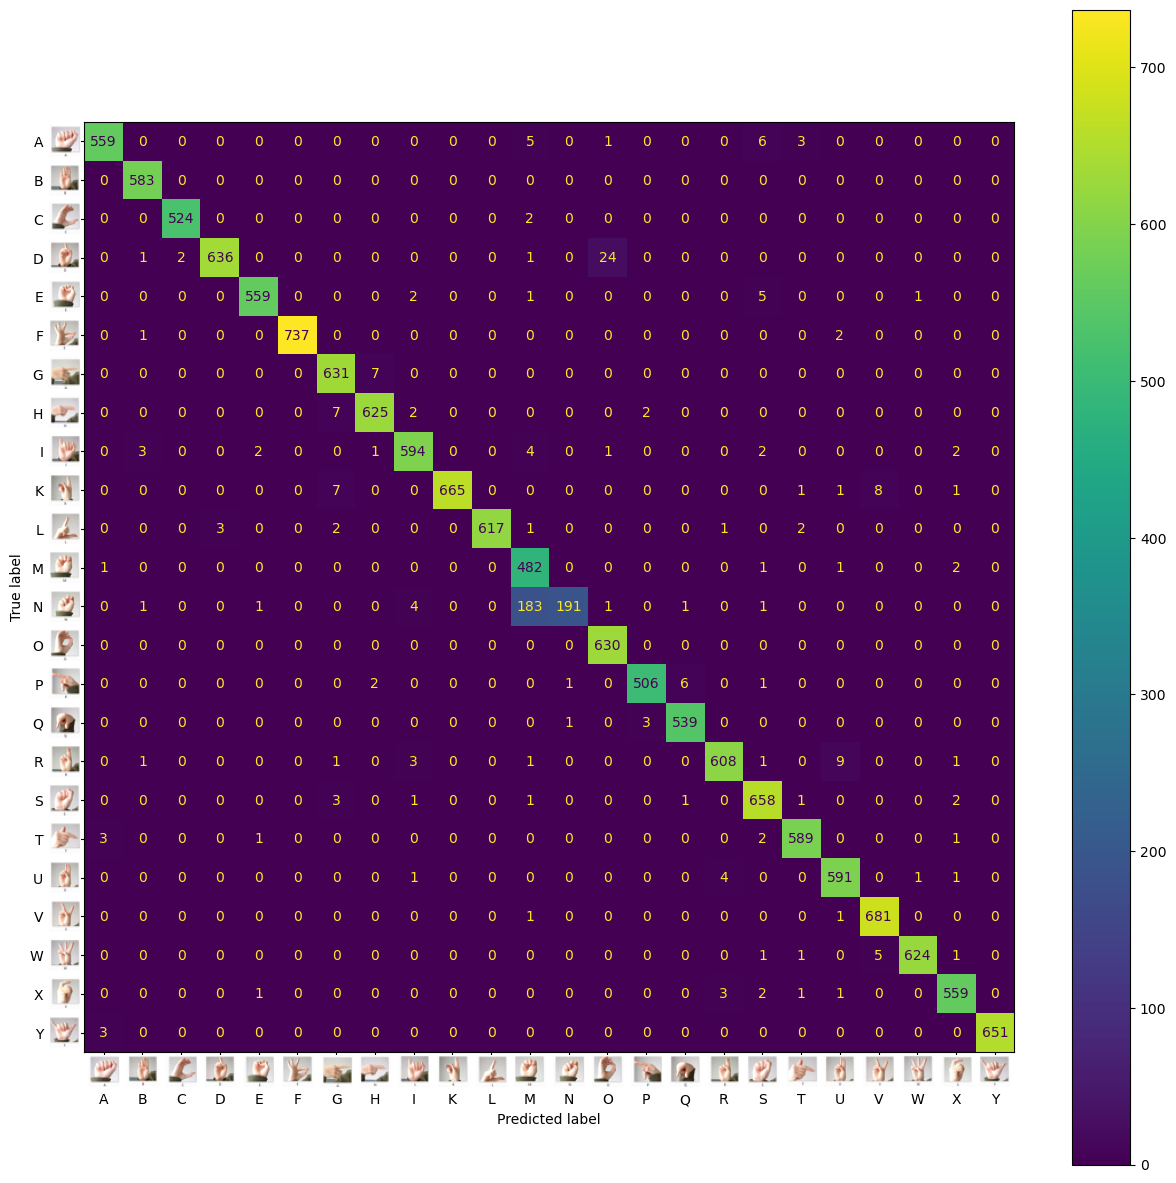

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_pred_value)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax)
ASL_ticks=['A', 'B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W',"X","Y"]
ax.tick_params(axis='x', which='major', pad=26)
ax.tick_params(axis='y', which='major', pad=26)
# Set the x-tick labels
ax.set_xticklabels(ASL_ticks)
ax.set_yticklabels(ASL_ticks)
xtick_positions = ax.get_xticks()
ytick_positions = ax.get_yticks()

ajout_image_x()
ajout_image_y()

fig.set_size_inches(15, 15)

[Text(0, 0, '25.708'), Text(0, 0, '59.889')]

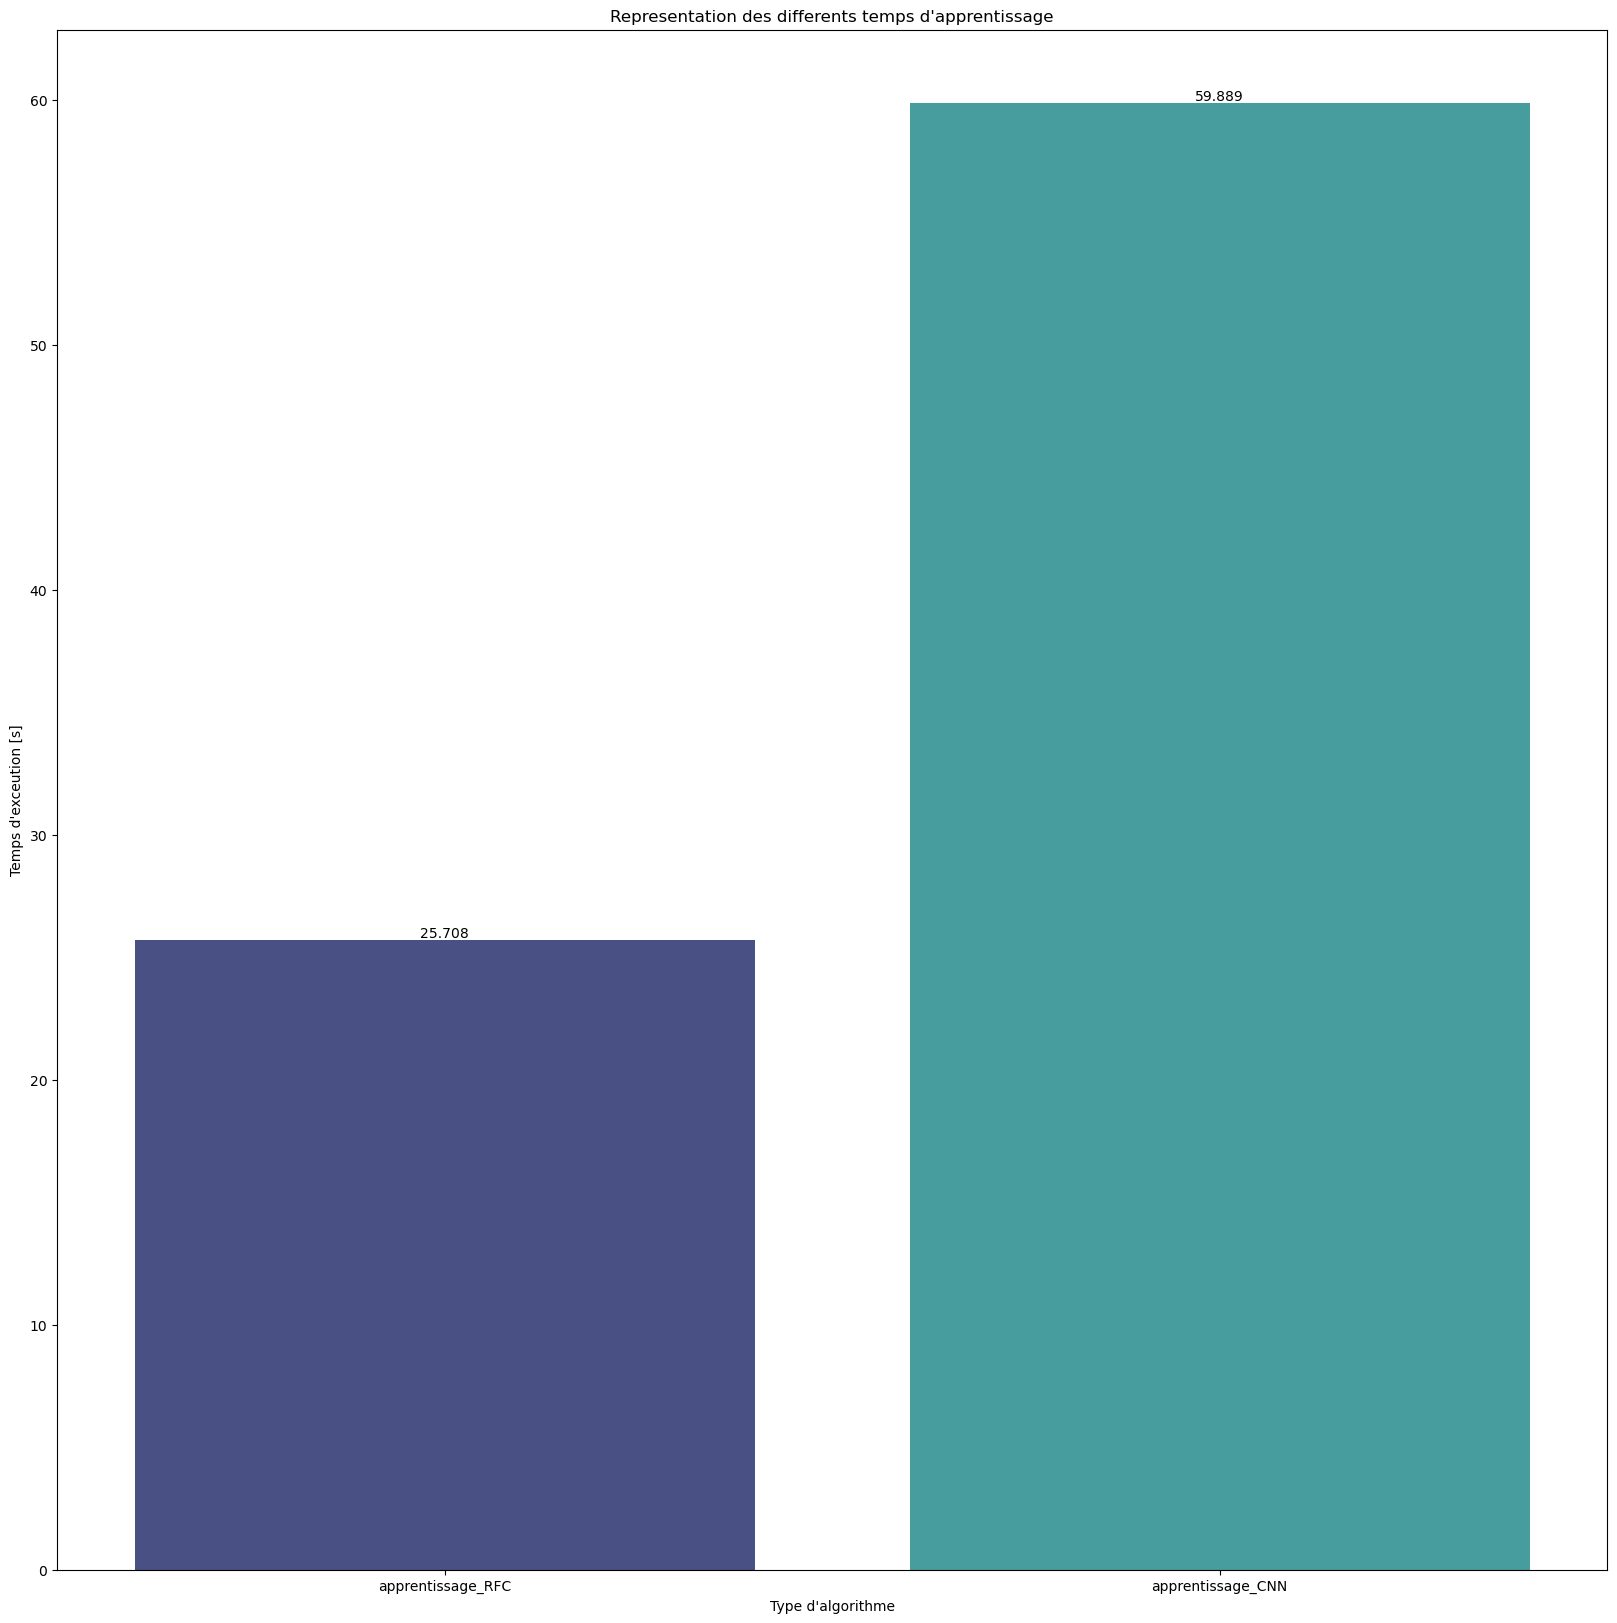

In [27]:
# Parcourt toutes les variables de l'environnement d'exécution
data = {}
for var in globals():
    # Vérifie si le nom de la variable commence par "apprentissage"
    if var.startswith('apprentissage_'):
        # Affiche le nom de la variable et sa valeur
        #print(var + ':', globals()[var])
        data[var] = globals()[var]

figure,ax = plt.subplots(figsize=(20, 20))
df_apprentissage = pd.DataFrame(data, index=['Temps_execution_s'])
df_apprentissage.sort_values(by=['Temps_execution_s'],axis=1,inplace=True)
# plt.figure(figsize=(20,20))
fig = sns.barplot(data = df_apprentissage,palette='mako')
fig.set(xlabel="Type d'algorithme",ylabel="Temps d'exceution [s]",title = "Representation des differents temps d'apprentissage")
fig.bar_label(ax.containers[0])

[Text(0, 0, '0.239'), Text(0, 0, '0.578')]

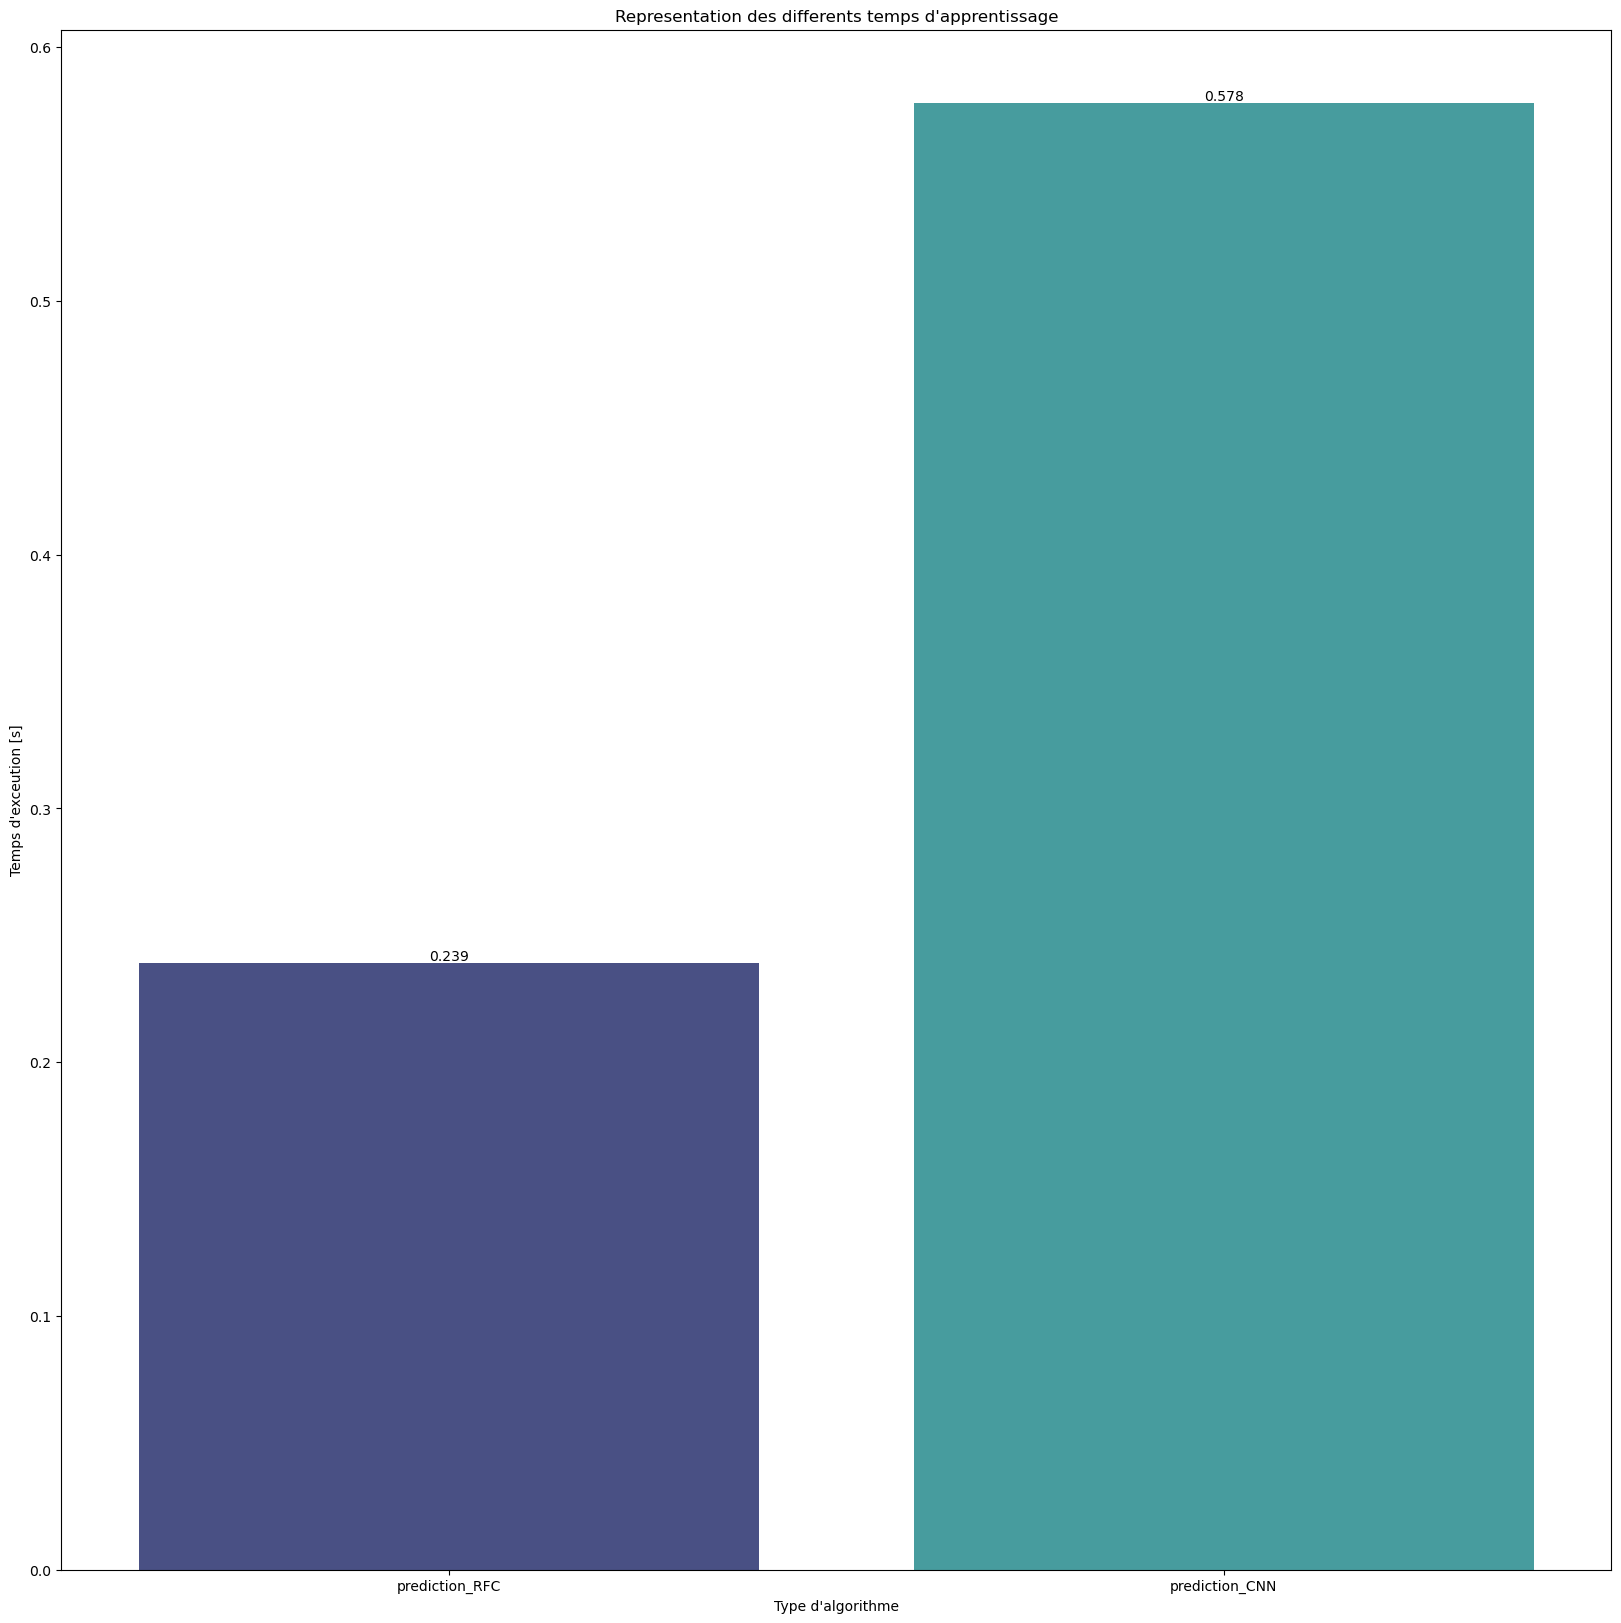

In [28]:
# Parcourt toutes les variables de l'environnement d'exécution
data = {}
for var in globals():
    # Vérifie si le nom de la variable commence par "apprentissage"
    if var.startswith('prediction_'):
        # Affiche le nom de la variable et sa valeur
        #print(var + ':', globals()[var])
        data[var] = globals()[var]

figure,ax = plt.subplots(figsize=(20, 20))
df_apprentissage = pd.DataFrame(data, index=['Temps_execution_s'])
df_apprentissage.sort_values(by=['Temps_execution_s'],axis=1,inplace=True)
# plt.figure(figsize=(20,20))
fig = sns.barplot(data = df_apprentissage,palette='mako')
fig.set(xlabel="Type d'algorithme",ylabel="Temps d'exceution [s]",title = "Representation des differents temps d'apprentissage")
fig.bar_label(ax.containers[0])

[Text(0, 0, '25.947'), Text(0, 0, '60.468')]

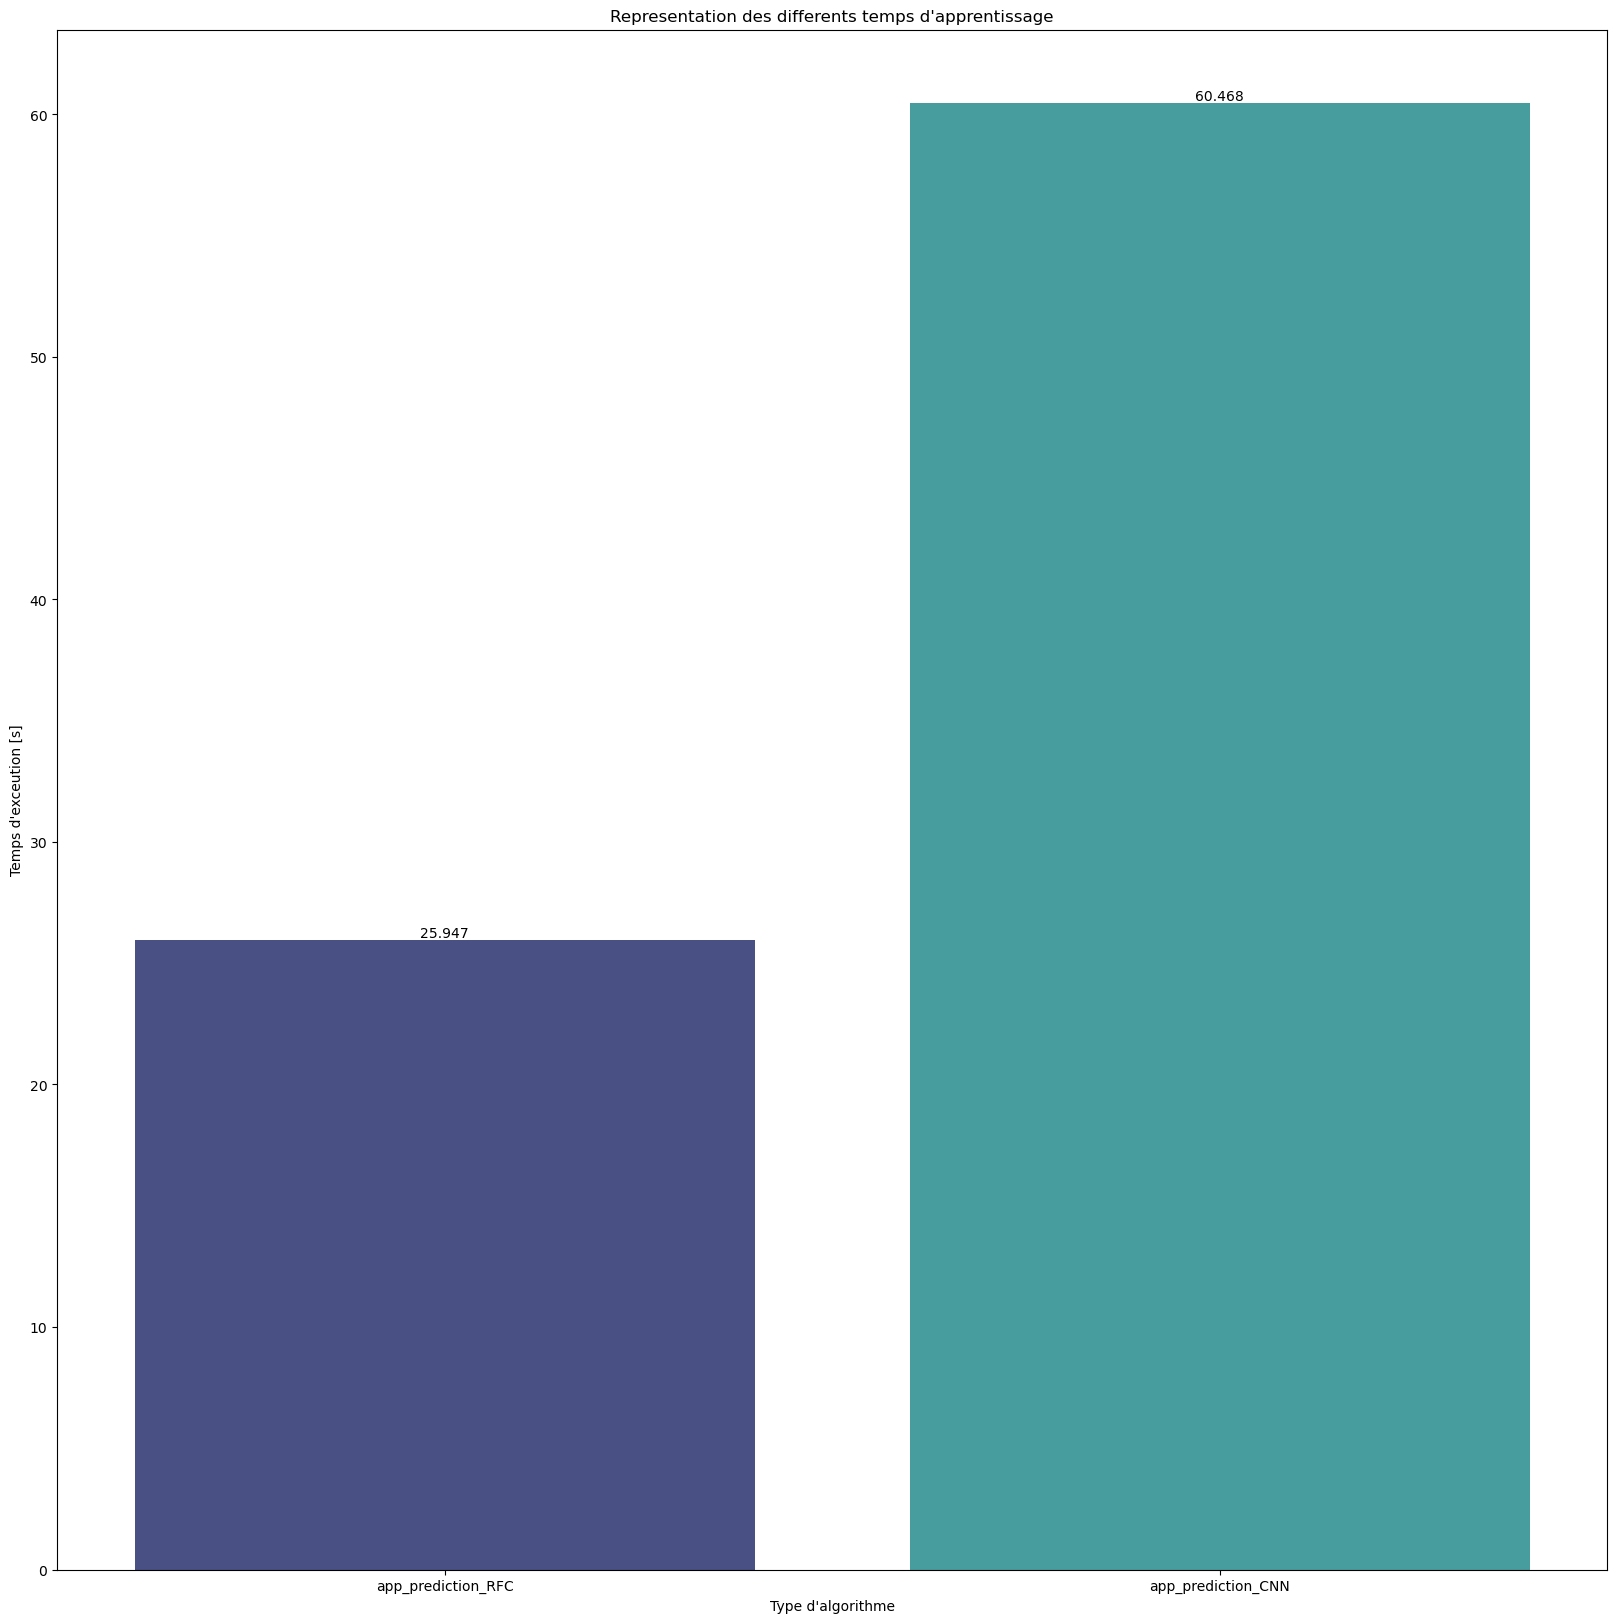

In [29]:
# Parcourt toutes les variables de l'environnement d'exécution
data = {}
for var in globals():
    # Vérifie si le nom de la variable commence par "apprentissage"
    if var.startswith('app_prediction'):
        # Affiche le nom de la variable et sa valeur
        #print(var + ':', globals()[var])
        data[var] = globals()[var]

figure,ax = plt.subplots(figsize=(20, 20))
df_apprentissage = pd.DataFrame(data, index=['Temps_execution_s'])
df_apprentissage.sort_values(by=['Temps_execution_s'],axis=1,inplace=True)
# plt.figure(figsize=(20,20))
fig = sns.barplot(data = df_apprentissage,palette='mako')
fig.set(xlabel="Type d'algorithme",ylabel="Temps d'exceution [s]",title = "Representation des differents temps d'apprentissage")
fig.bar_label(ax.containers[0])

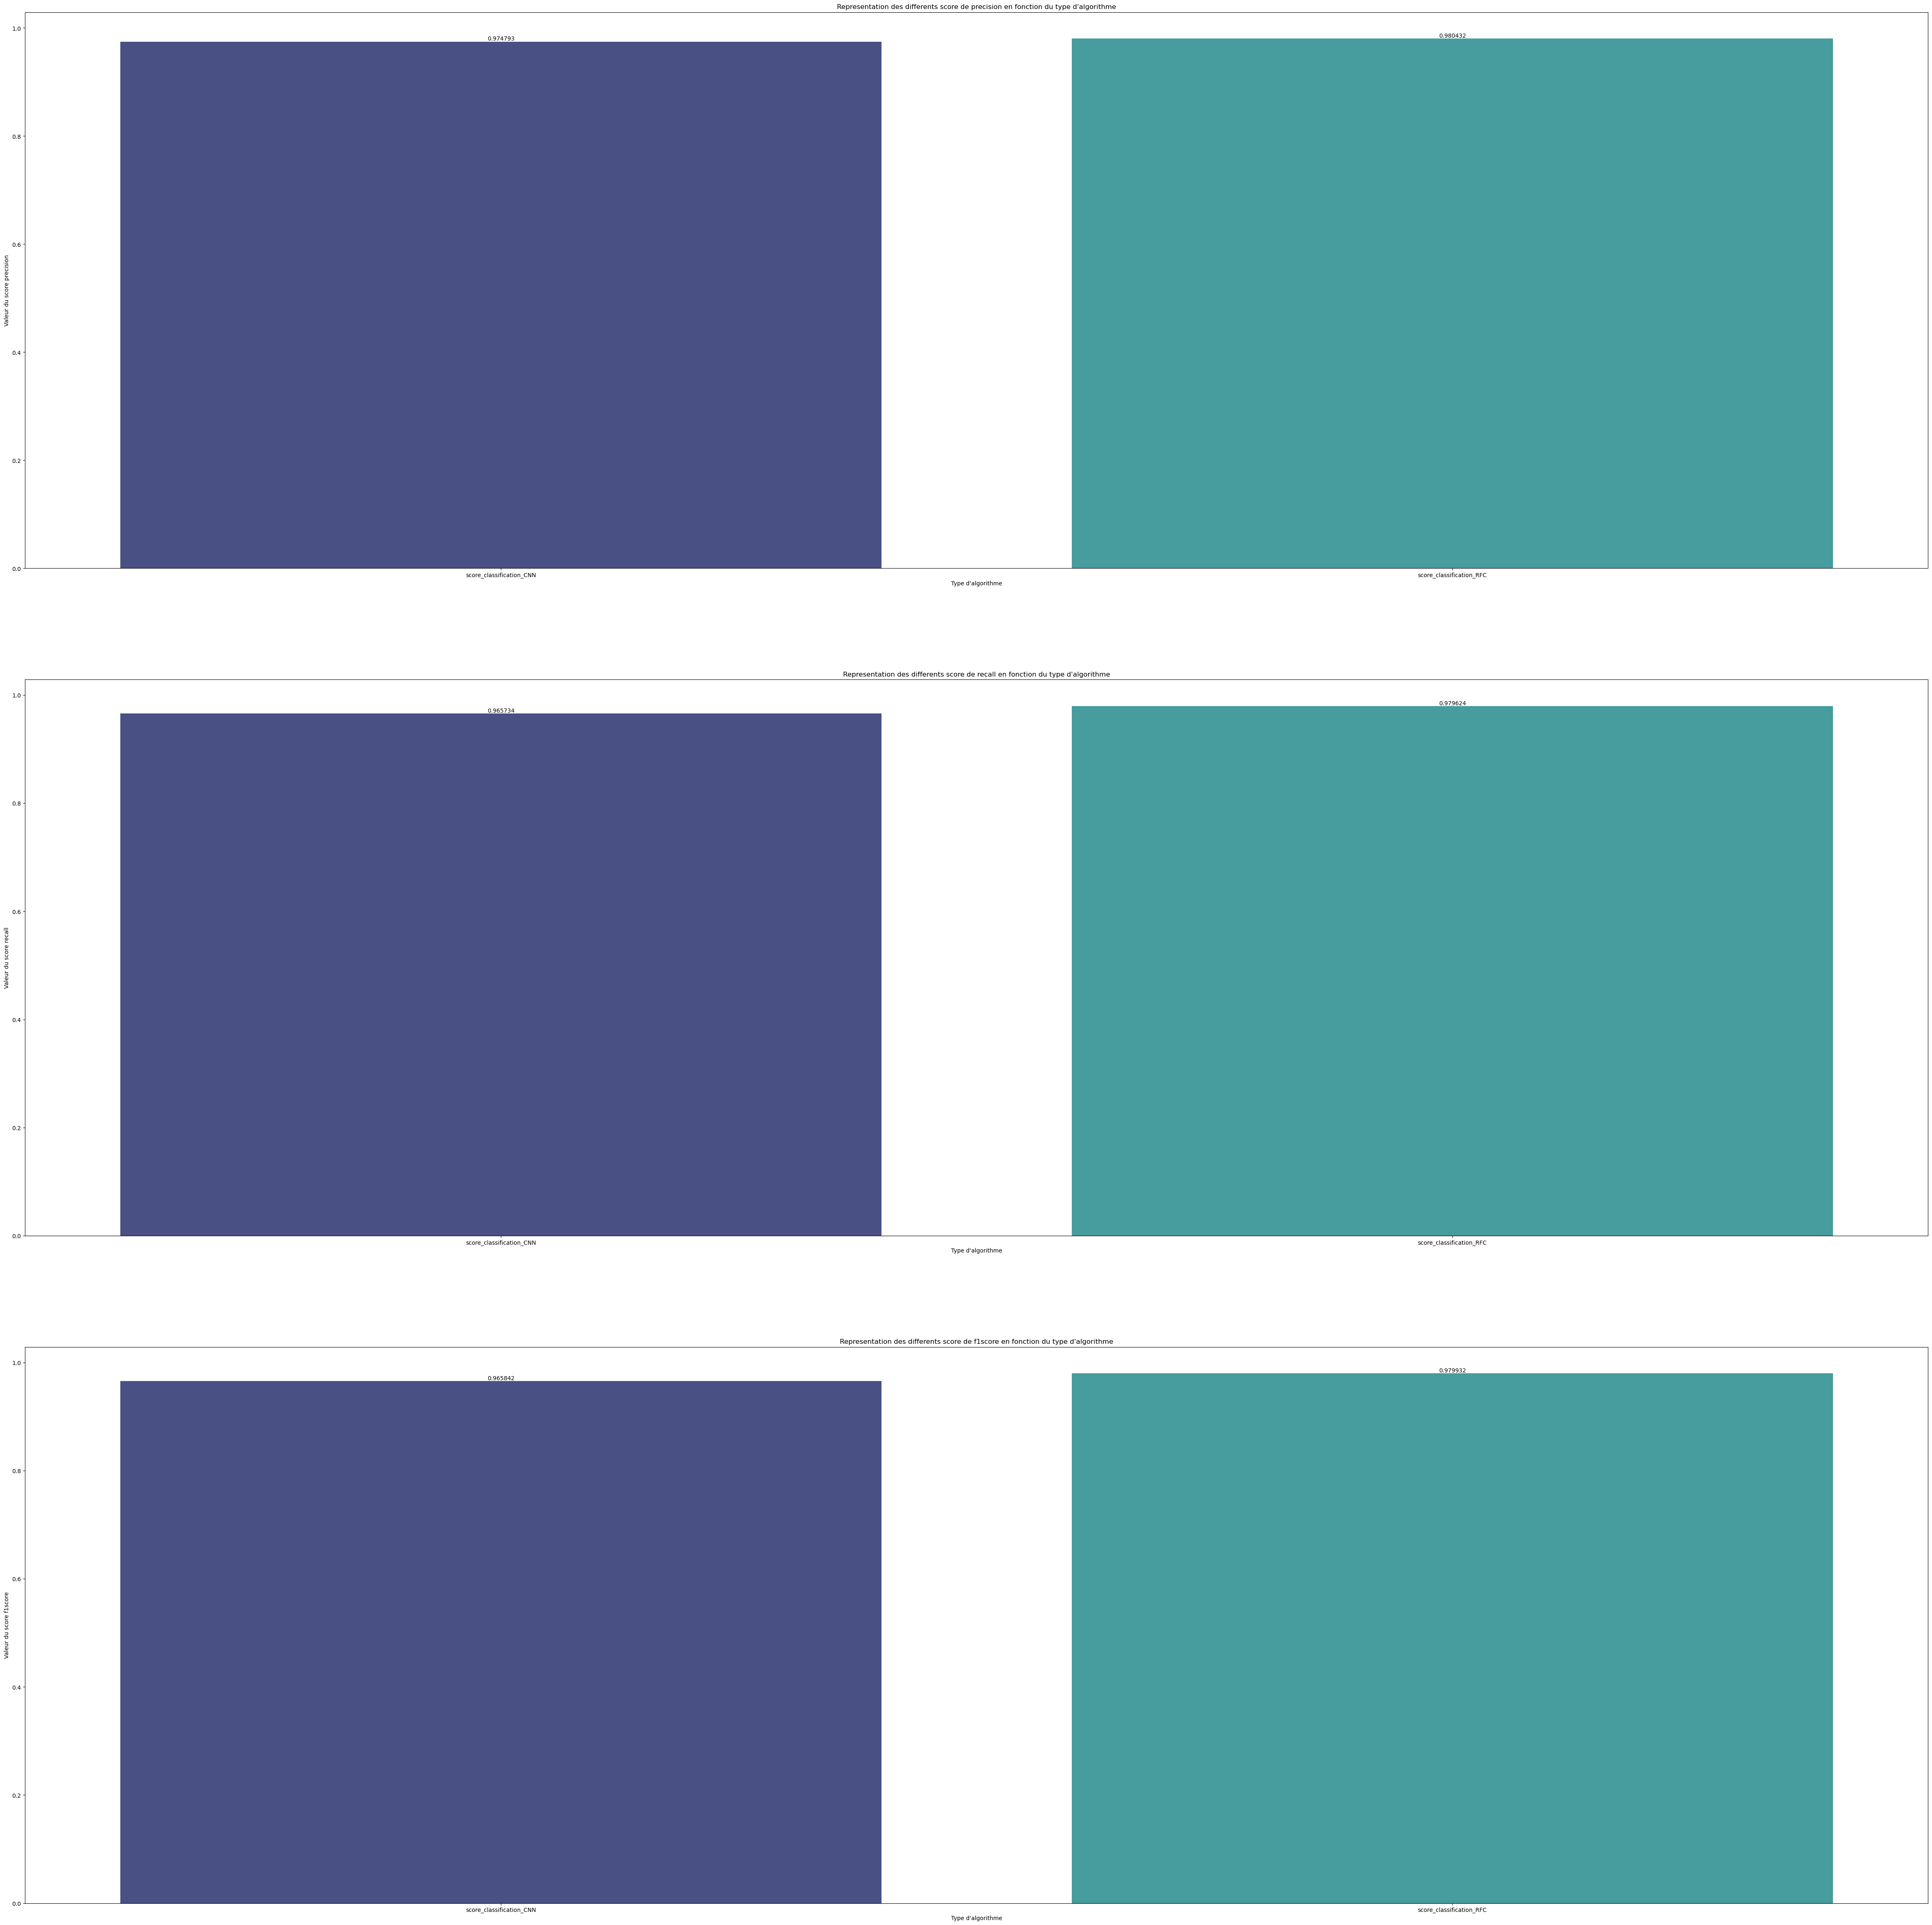

In [35]:
# Parcourt toutes les variables de l'environnement d'exécution
data = {}
for var in globals():
    # Vérifie si le nom de la variable commence par "apprentissage"
    if var.startswith('score_classification'):
        # Affiche le nom de la variable et sa valeur
        #print(var + ':', globals()[var])
        data[var] = globals()[var]



df_score = pd.DataFrame(data)

s=df_score.iloc[0,:]
df_score_precision=s.to_frame()
df_score_precision=df_score_precision.T

v=df_score.iloc[1,:]
df_score_recall=v.to_frame()
df_score_recall=df_score_recall.T

w=df_score.iloc[2,:]
df_score_f1score=w.to_frame()
df_score_f1score=df_score_f1score.T

j=df_score.iloc[3,:]
df_score_support=j.to_frame()
df_score_support=df_score_support.T

df_score_precision.sort_values(by=['precision'],axis=1,inplace=True)
df_score_recall.sort_values(by=['recall'],axis=1,inplace=True)
df_score_f1score.sort_values(by=['f1-score'],axis=1,inplace=True)


fig, (ax1, ax2, ax3) = plt.subplots(3, 1,figsize=(60,60))
# plot the first data frame
# df1.plot(ax=ax1)
fig = sns.barplot(data = df_score_precision,ax=ax1,palette='mako')
fig.set(xlabel="Type d'algorithme",ylabel="Valeur du score precision",title = "Representation des differents score de precision en fonction du type d'algorithme")
fig.bar_label(ax1.containers[0])
# plot the second data frame
fig = sns.barplot(data = df_score_recall,ax=ax2,palette='mako')
fig.set(xlabel="Type d'algorithme",ylabel="Valeur du score recall",title = "Representation des differents score de recall en fonction du type d'algorithme")
fig.bar_label(ax2.containers[0])
# plot the third data frame
fig = sns.barplot(data = df_score_f1score,ax=ax3,palette='mako')
fig.set(xlabel="Type d'algorithme",ylabel="Valeur du score f1score",title = "Representation des differents score de f1score en fonction du type d'algorithme")
fig.bar_label(ax3.containers[0])
# show the figure
plt.show()